## Demo on how to use CAOL with handcrafted filters 

This demo file is a recipe to: (1) create a filter matrix that includes handcrafted filters based on the DCT, (2) load in training data from the test images package, (3) run CAOL with a given number of handcrafted filters, and (4) display the final filter matrix. 

See https://github.com/dahong67/ConvolutionalOperatorLearning.jl for more information 

Relevant citations: 

[1] Il Yong Chun and Jeffrey A. Fessler, "Convolutional analysis operator learning: Acceleration and convergence," IEEE Trans. Image Process. (to appear), Aug. 2019. [Online] Available: http://arxiv.org/abs/1802.05584

[2] Caroline Crockett, David Hong, Il Yong Chun, Jeffrey A. Fessler, "Incorporating handcrafted filters in convolutional analysis operator learning for ill-posed inverse problems," Accepted to IEEE CAMSAP 2019

In [1]:
using LinearAlgebra, ConvolutionalOperatorLearning, Plots, MIRT
using Random: seed!
# using TestImages # if you want to load a test image 

### Step 1: create a filter matrix with handcrafted filters

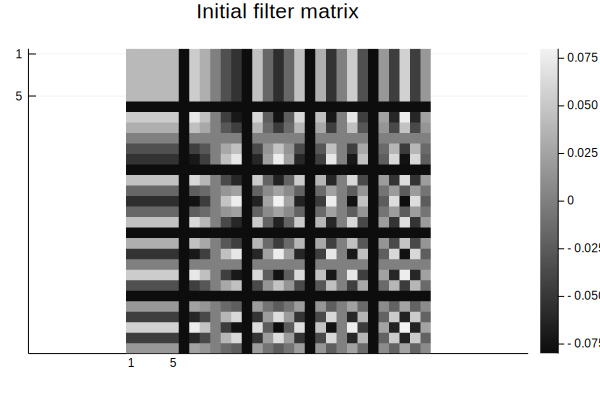

In [2]:
R = 5 # the filters will be R x R and there will be K=R^2 of them

h0 = generatefilters(:DCT, (R,R); form=:matrix)
jim(reshape(h0, (R,R,R^2)), title="Initial filter matrix")

### Step 2: load in or generate training data

If you have a mat file with data, you could load it in as: <br>
``train = matread("training_data.mat")["train"]`` <br>
The file must include a variable named train that should be size nx x ny x n

You could also use the TestImages package to load a sample image and then convert that image to an array: <br>
``img = testimage("house") 
img = Float32.([img[i,j].val for i in 1:size(img,1), j in 1:size(img,2)])' ``

Here, we use a example image that is available from the MIRT package.

(192, 256)

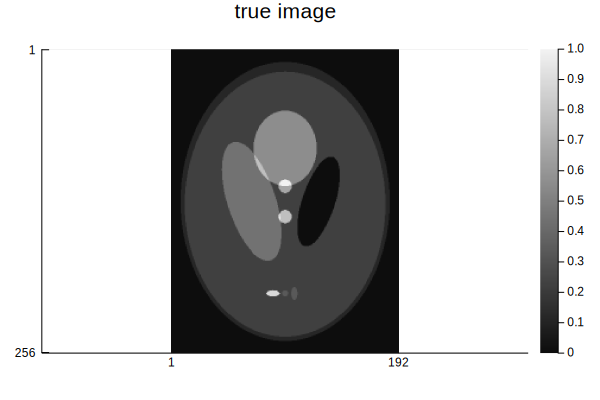

In [20]:
# shepp-logan phantom
nx,ny = 192,256
Xtrue = ellipse_im(ny, oversample=2)[Int((ny-nx)/2+1):Int(ny-(ny-nx)/2),:]
nx,ny = size(Xtrue)
display(size(Xtrue))
Xtrue = Xtrue ./ maximum(Xtrue[:])
jim(Xtrue, "true image")

In [21]:
x = [Xtrue]; 
# you could use additional training images by doing 
# train = [img1, img2, ..., imgN]

### Step 3: Run CAOL with handcrafted filters

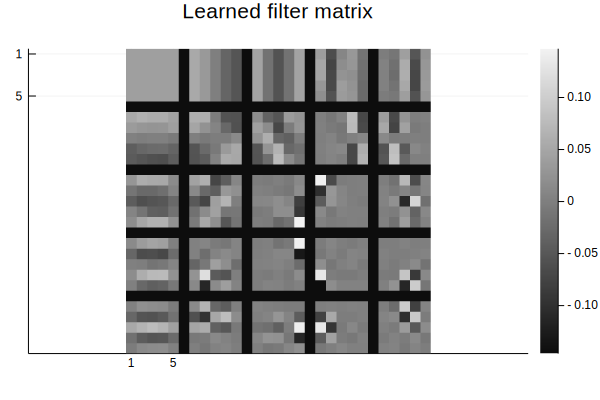

In [22]:
# run CAOL to learn (K-p) filters
p = 3 # number of handcrafted filters
λ = 5e-5 # must be tuned for a specific dataset and goal! 
maxiters = 100 # maximum number of iterations to run 
CAOL(x, λ, (h0, (R,R)); p=p, maxiters=1, trace=true); # force precompile 
h, Htrace, objtrace, Hdifftrace = CAOL(x, λ, (h0, (R,R)); p=p, maxiters=maxiters, trace=true);
jim(reshape(h, (R,R,R^2)), title="Learned filter matrix")

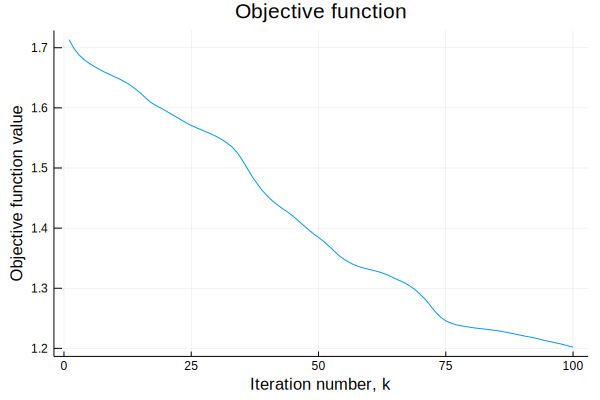

In [18]:
plot(1:length(objtrace), objtrace, title="Objective function", label="")
plot!(xlabel="Iteration number, k", ylabel="Objective function value")

### Step 4: Save the filter matrix for further processing

To save the filter matrix for further processing (e.g., denoising or reconstruction) in MATLAB, you can use: 

``file = matopen("learned_filters.mat", "w")
write(file, "H", H)
close(file)``